In [ ]:
"""
Data representation and processing:

This notebook imports and plots a preprocessed dataframe.
Also it crops a time interval of the data and saves it. 


@author: curro
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataframes
df = pd.read_pickle('preprocessed_data/final_2018')
df1 = pd.read_pickle('preprocessed_data/final_2019')
df2 = pd.read_pickle('preprocessed_data/final_2020')

# Append preprocessed dataframes to create a new one
df=df.append(df1,ignore_index=True);
df=df.append(df2,ignore_index=True);

# Show first rows
df.head()

index  val_sessions  val_total_power  val_power_median
0 2018-04-25 11:08:04+00:00           1.0         3.602725          3.602725
1 2018-04-25 12:08:04+00:00           1.0         3.602725          3.602725
2 2018-04-25 13:08:04+00:00           1.0         3.602725          3.602725
3 2018-04-25 14:08:04+00:00           2.0         1.459559          0.729779
4 2018-04-25 15:08:04+00:00           7.0         9.822627          0.895217

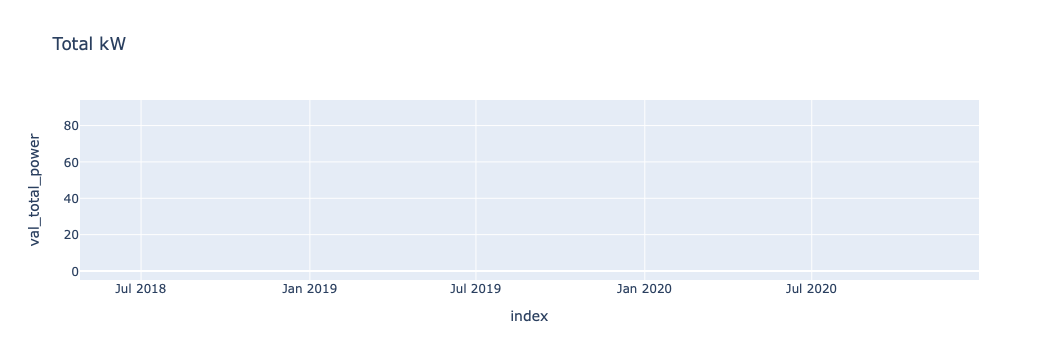

In [4]:
# Plot settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
pd.options.plotting.backend = "plotly"

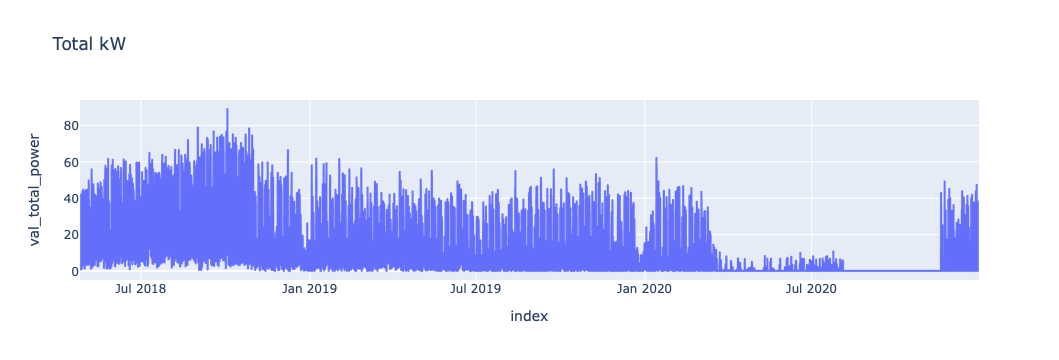

In [6]:
# Plot hourly demanded power
df.plot(x='index', 
             y='val_total_power', 
             title='Total kW')

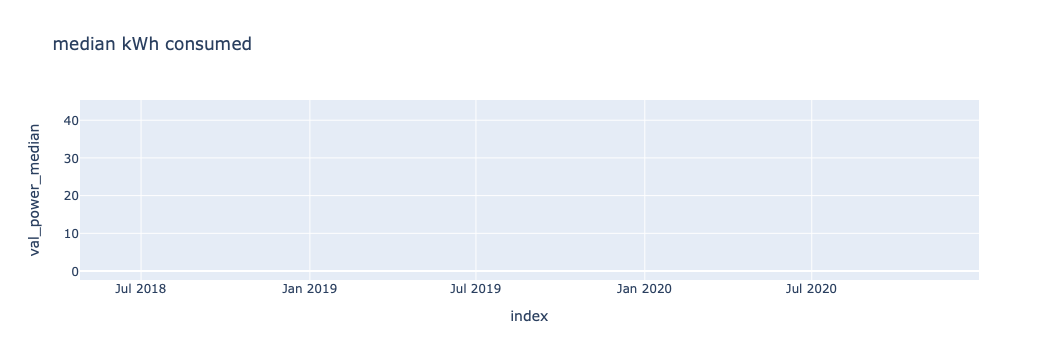

In [7]:
# Plot median of the power consumed by different concurrent sessions 
df.plot(x='index', 
             y='val_power_median', 
             title='median kWh consumed')

In [11]:
# Filter and select the interval to crop data
start='2019-01-01 00:01:00+00:00'
end='2019-12-10 23:59:00+00:00'

filt = (df['index'] >= pd.to_datetime(start)) & (df['index'] < pd.to_datetime(end))
df=df.loc[filt]

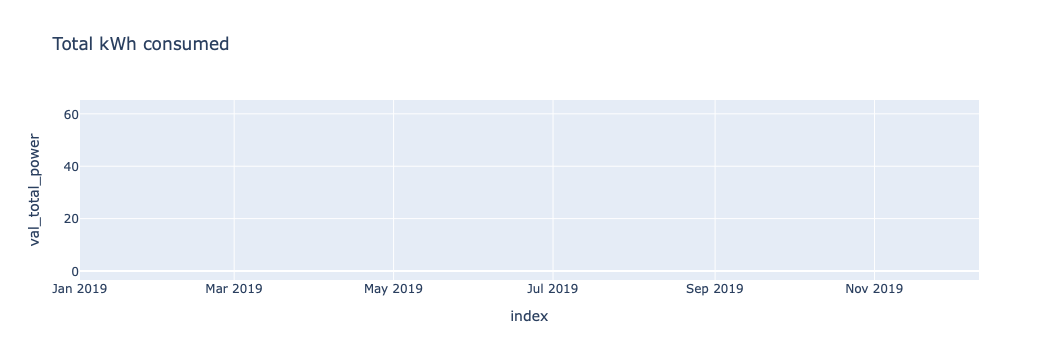

In [12]:
# Plot new-cropped data
df.plot(x='index', 
             y='val_total_power', 
             title='Total kWh consumed')

In [13]:
# Export processed data to a new file
df.to_pickle('./processed_data/data2019.pkl')